In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

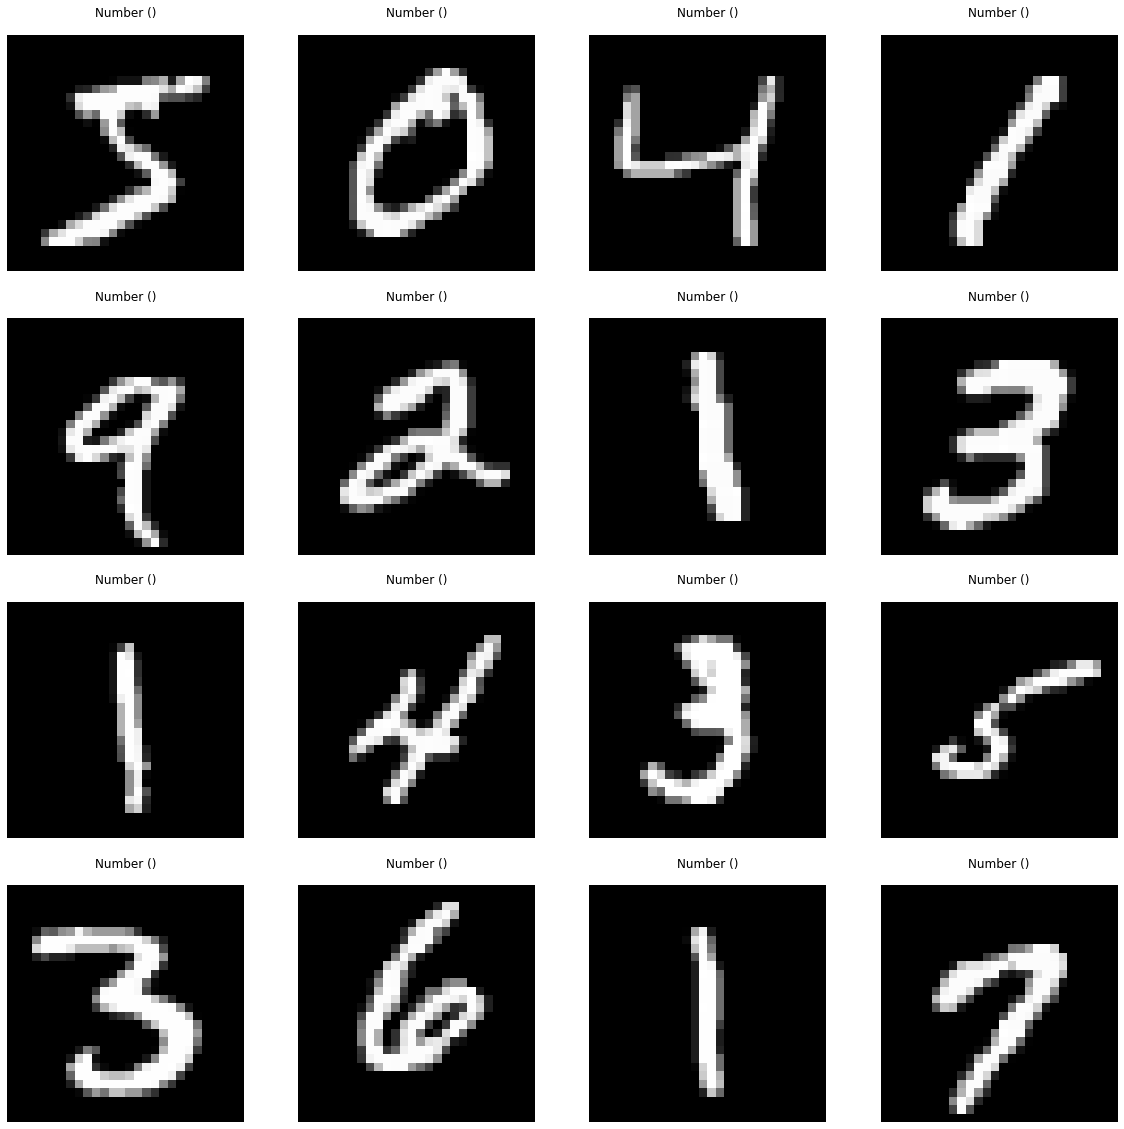

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(4, 4, figsize= (20, 20))
plt.gray()
for i, ax in enumerate(axes.flat):
  ax.matshow( x_train[i])
  ax.axis('off')
  ax.set_title('Number ()'.format(y_train[i]))
fig.show()

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train_shape: ', x_train.shape)

print('no. of images in X train: ', x_train.shape[0])
print('no. of images in X test: ', x_test.shape[0])

x_train_shape:  (60000, 28, 28, 1)
no. of images in X train:  60000
no. of images in X test:  10000


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D ,Flatten ,MaxPooling2D, Dropout

In [8]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape= input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add (Flatten())

model.add (Dense(128, activation= tf.nn.relu))
model.add (Dropout(0.2))
model.add (Dense(10, activation= tf.nn.softmax))

In [9]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train , y=y_train , epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2029 - accuracy: 0.9399
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0835 - accuracy: 0.9742
Epoch 3/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0595 - accuracy: 0.9818


In [10]:
pred = model.evaluate(x_test,  y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0525 - accuracy: 0.9827
